# Student Identification
* Your name

* Your student number

Here's where we import libraries needed by the document.  The `linclass` module can be downloaded from Moodle.  Make sure it's in the same directory as this document.

In [1]:
import matplotlib.pyplot as plt
import linclass as lc

## The Data 
The data consists of tuples $(x_1,x_2,y)$ where the attributes are $x_1$ and $x_2$, and the class label is $y$.  The training process looks at the $y$ values, but the resulting classifier does not.

In [2]:
D = [ (1, 3, 1), (2, 4, 1), (2, 2, 0), (3, 1, 0) ]

To plot the data, we separate the two classes.  The learning rule doesn't look at our two sublists.

In [3]:
class_0 = [(x1,x2) for (x1,x2,y) in D if y == 0]
class_1 = [(x1,x2) for (x1,x2,y) in D if y == 1]

## Separating the classes with a single line
Here we set the value for slope and $y$-intercept for a line that separates the two classes.  The `linclass` module is fully general, using the conventional linear algebra representation for lines as a vector (a Python list) of coefficients $\mathbf{w}$.

### Aside: two representations of a line in 2D.
Even though Linear Algebra is a required course in Computer Science, most students are more familiart with the slope,intercept representation of a line.  Here, the form is $x_2 = mx_1 + b$.  To accomodate this fact, we'll start with $m$ and $b$, but convert to an appropriate list of coefficients.  The translation can be understood as follows: 

A linear model in 2 dimensions means that $\mathbf{x} = (x_0, x_1, x_2)$, and $\mathbf{w} = (w_0, w_1, w_2)$.

If we compare the two formulae:

> $x_2 = mx_1 + b$

> $\mathbf{x} \cdot \mathbf{w} = 0$

It's not hard to work out that $x_0 = 1, w_2 = 1, w_1 = -m, w_0 = -b$.  (This is one solution of several). 

### TO DO: Choose a different line
In the code below, `m` and `b` are assigned specific values that separate the two classes.  Your task is to choose new values for `m` and `b` that also separate the two classes.  You can do this anakytically, by drawing a line and working out the value of `m` and `b`, or by trial and error.

To complete this TODO item, make sure that your choice of `m` and `b` defines a line that separates the original data set `D`.

In [4]:
# in the form x2 = m*x1 + b
m, b = 0, 2.5

# in terms of coefficients in a general line through 2D
line = lc.Line([-b, -m, 1])

Now we plot the data and the line, showing separation.

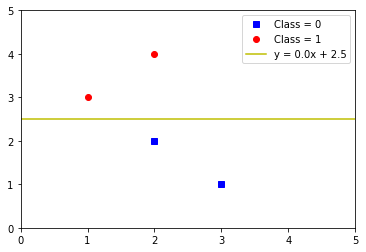

In [5]:
# plot the two classes' points
plt.plot([x1 for (x1,x2) in class_0], [x2 for (x1,x2) in class_0], "bs")
plt.plot([x1 for (x1,x2) in class_1], [x2 for (x1,x2) in class_1], "ro")

# plot the line
plt.plot(range(0,6), [line.f([1, x1]) for x1 in range(0,6)],"y")

# set the extent of the axes, and add a key/legend to the figure
plt.xlim(0,5)
plt.ylim(0,5)
plt.legend(['Class = 0', 'Class = 1', line.mxb()])  
plt.show()

Humans can see that the line separates the points, but for a classifier, we need a function to return the class of any point given a line.  The `LinearClassifier` class has a method for that named `classify()`.

In [6]:
pretrained = lc.LinearClassifier()
pt = list(class_0[0])  # a class 0 point

pt_class = pretrained.classify(line, [1] + pt)

print('The point', pt, 'is predicted to be class', pt_class)

The point [2, 2] is predicted to be class 0


The `LinearClassifier` class also has a method to show how the classifier works on a set of points, named `tabulate_class()`.

In [7]:
pretrained.tabulate_class(D, line)

   x1   x2   LM   Pred Class
  1.0  3.0  0.5   1    1
  2.0  4.0  1.5   1    1
  2.0  2.0 -0.5   0    0
  3.0  1.0 -1.5   0    0


In the above table, `x1` and `x2` are the coordinates of each data point in `D`.  The column labelled `LM` shows the value $\mathbf{x} \cdot \mathbf{w}$ (there is a method called `linear_model()` to do this, explained below).  The column `Pred` shows the *prediction*, that is, the output of the function `classify()` for each point and the given line.  The column `Class` shows the recorded class of each data point, as labelled in the data `D`.

If a line separates the data correctly, the column `Pred` will be identical to the `Class` column. 

## Demonstrating the learning rule
Let's add a new point to the data, one that is not classified correctly by the line.

In [8]:
D1 = D + [(3,4,0)]
class_0 = [(x1,x2) for (x1,x2,y) in D1 if y == 0]
class_1 = [(x1,x2) for (x1,x2,y) in D1 if y == 1]

## TODO: Add a point to the data
In the code above, a new point in class 0 (blue) is created and added to the data.  Your task is to add one more red point (Class 1) to the data.  

To complete this TODO item, choose a new red point as follows:
1. The new points should be on the wrong side of the line that you created above.  In other words the line does not separate the data correctly.
1. Make sure that the two classes are actually linearly separable, even though your current line doesn't separate them correctly.  

We'll use the classifier to find a new line to separate the data, but it will not work if the data are not separable.

We'll plot them now, just to visualize the situation before learning.

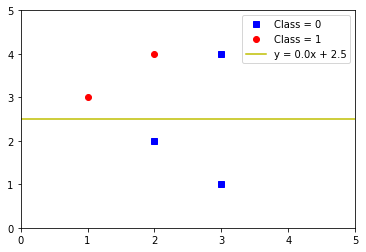

In [9]:
# plot the two classes' points
plt.plot([x1 for (x1,x2) in class_0], [x2 for (x1,x2) in class_0], "bs")
plt.plot([x1 for (x1,x2) in class_1], [x2 for (x1,x2) in class_1], "ro")

# plot the line
plt.plot(range(0,6), [line.f([1, x1]) for x1 in range(0,6)],"y")

# set the extent of the axes, and add a key/legend to the figure
plt.xlim(0,5)
plt.ylim(0,5)
plt.legend(['Class = 0', 'Class = 1', line.mxb()])  
plt.show()

For a linear classifier, the learning rule is a step calculated by gradient descent to minimize error.  The best step is to move the line towards a mis-classified point, and has been determined mathematically by calculus, so we don't need to try all neighbours as in hill-climbing.  In the `LinearClassifier` class, the learning rule is implemented in the method `best_step()`.

In [10]:
# create a linear classifier object
fitting = lc.LinearClassifier()

In Hill-climbing, we keep stepping until we reach the top of a local maximum.  Same for gradient ascent/descent.

## TODO: Increase the number of learning steps
In the code below, the number of steps is determined by the variable `steps` which is currently set to `0`.  And a few lines later, we plot the effect of learning.  

1. Set `steps = 1`; rerun the learning, and replot the data and the lines.  Notice how the line changed.
1. Set `steps = 2`; rerun the learning, and replot the data and the lines.  Notice how the line changed.
1. Experiment with the value of `steps`.  What is the smallest value needed to find a separating line?

To complete this TODO item, set the value of `steps` so that the fitted line separates the two classes.

In [11]:
# start with the original line
line2 = line

# initial learning rate
alpha = 0.1

# how many steps to use
steps = 0

# learn, by taking enough steps
for i in range(steps):
    # look at all the data each time
    for pt in D1:
        line2 = fitting.best_step(line2, alpha, pt)

Typically, the hill-climbing loop to train a classifier is implemented as a method inside the classifier's class, and not exposed as part of a script, as above.  It's traditional to name such a method `fit()`.  As a method, the implementation can check when the top of the hill has been reached, and can do other things, like adjust the learning rate dynamically. 

Now plot the old line and the new line, showing all the data.

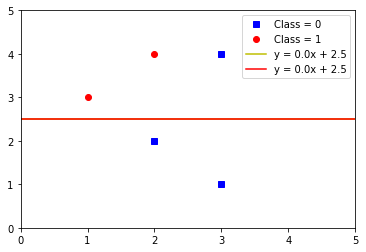

In [12]:
# points from the two classes
plt.plot([x1 for (x1,x2) in class_0], [x2 for (x1,x2) in class_0], "bs")
plt.plot([x1 for (x1,x2) in class_1], [x2 for (x1,x2) in class_1], "ro")

# the original line 

plt.plot(range(0,6), [line.f([1, x1]) for x1 in range(0,6)],"y")

# the new line
plt.plot(range(0,6), [line2.f([1, x1]) for x1 in range(0,6)],"r")

plt.xlim(0,5)
plt.ylim(0,5)
plt.legend(['Class = 0', 'Class = 1', line.mxb(), line2.mxb()])  # in the order of the calls to plot() above
plt.show()

The learning process has shifted and rotated the red line.  All the points should be predicted correctly in the table below.

In [13]:
pretrained.tabulate_class(D1, line2)

   x1   x2   LM   Pred Class
  1.0  3.0  0.5   1    1
  2.0  4.0  1.5   1    1
  2.0  2.0 -0.5   0    0
  3.0  1.0 -1.5   0    0
  3.0  4.0  1.5   1    0 ** Classification error
